In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\Users\Shlok Sonkusare\AppData\Local\Temp\ipykernel_23456\185734675.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


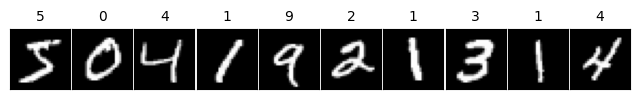

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(8, 5), gridspec_kw={'wspace': 0.04, 'hspace': 0.01}, squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)

plt.tight_layout()
plt.show()

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [22]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [23]:
datagen = ImageDataGenerator(rescale=1./255) 
history = model.fit(datagen.flow(x_train, y_train, batch_size=100), epochs=20, 
                    validation_data=(x_test, y_test))

Epoch 1/20
514/600 [========================>.....] - ETA: 4s - loss: 2.3016 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - accuracy: 0.1122

KeyboardInterrupt: 